## Hometask 

1) Classify the signs (fingers)  dataset 

2) Try to change the number of hidden layer 

3) Change the activation to tanh or sigmoid and see what happens

4) Change the dropout ratio and check the performance

In [1]:
import numpy as np
import h5py
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D,Flatten
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
def load_dataset():
    fn = 'E:\\University\\Інше\\IV Amazinum Data Science Camp\\Lecture 28\\train_signs.h5'
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) 
    Y_train = np.array(train_dataset["train_set_y"][:]) 

    fn ='E:\\University\\Інше\\IV Amazinum Data Science Camp\\Lecture 28\\test_signs.h5'
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) 
    Y_test = np.array(test_dataset["test_set_y"][:]) 

    classes = np.array(test_dataset["list_classes"][:])

    return X_train, Y_train, X_test, Y_test, classes


In [3]:
X_train, Y_train, X_test, Y_test, classes = load_dataset()

print ('train_data.shape=', X_train.shape)
print ('train_labels.shape=',  Y_train.shape)
print ('test_data.shape=', X_test.shape)
print ('test_labels.shape=', Y_test.shape)

train_data.shape= (1080, 64, 64, 3)
train_labels.shape= (1080,)
test_data.shape= (120, 64, 64, 3)
test_labels.shape= (120,)


In [4]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None:
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows):
        for j in range (n_cols):
            index = n_cols*i+j
            ax = plt.subplot(n_rows,n_cols,index+1)
            ax.imshow(X[indices[index]], cmap='Greys')
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

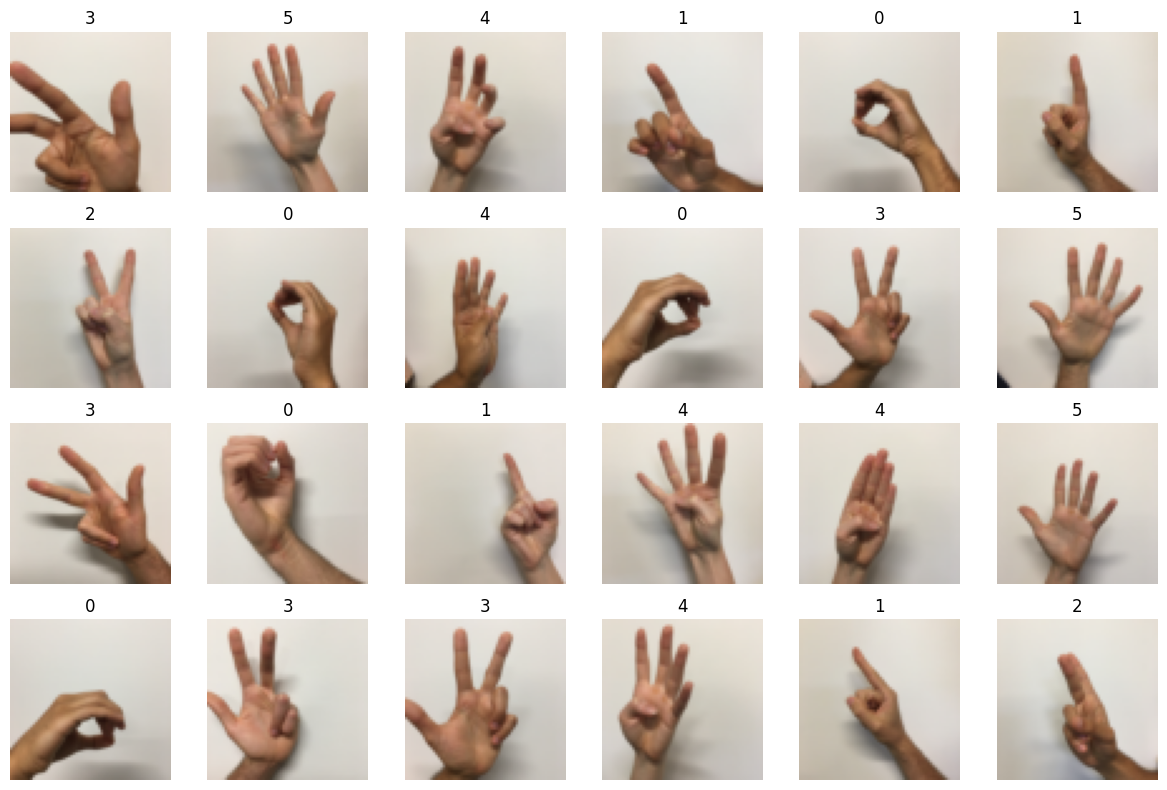

In [5]:
plt.figure(figsize= (12,8))
display_samples_in_grid(X_train, n_rows=4, n_cols=6, y= Y_train.T)
plt.tight_layout(h_pad=1, w_pad=1)

In [6]:
from keras.preprocessing.image import ImageDataGenerator

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [7]:
datagen.fit(X_train)

In [8]:
# Define the model
model = Sequential()

# Add layers
model.add(Conv2D(32, (3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080,)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120,)


In [ ]:
epochs = 10
batch_size = 30
history = model.fit(X_train, to_categorical(Y_train.T), epochs=epochs, batch_size=batch_size, validation_data=(X_test, to_categorical(Y_test.T)))

Epoch 1/10


36/36 [==============================] - 3s 42ms/step - loss: 33.9995 - accuracy: 0.3546 - val_loss: 0.9696 - val_accuracy: 0.6750
Epoch 2/10
36/36 [==============================] - 1s 32ms/step - loss: 0.6590 - accuracy: 0.7630 - val_loss: 0.7703 - val_accuracy: 0.7750
Epoch 3/10
36/36 [==============================] - 3s 81ms/step - loss: 0.2729 - accuracy: 0.9148 - val_loss: 0.6819 - val_accuracy: 0.7917
Epoch 4/10
36/36 [==============================] - 3s 92ms/step - loss: 0.1970 - accuracy: 0.9352 - val_loss: 0.7283 - val_accuracy: 0.8083
Epoch 5/10
36/36 [==============================] - 3s 96ms/step - loss: 0.0535 - accuracy: 0.9861 - val_loss: 0.8900 - val_accuracy: 0.7500
Epoch 6/10
36/36 [==============================] - 3s 87ms/step - loss: 0.0399 - accuracy: 0.9898 - val_loss: 0.8027 - val_accuracy: 0.7917
Epoch 7/10
36/36 [==============================] - 1s 37ms/step - loss: 0.0144 - accuracy: 0.9981 - val_loss: 0.7748 - val_accuracy: 0.7917
Epoch 8/10

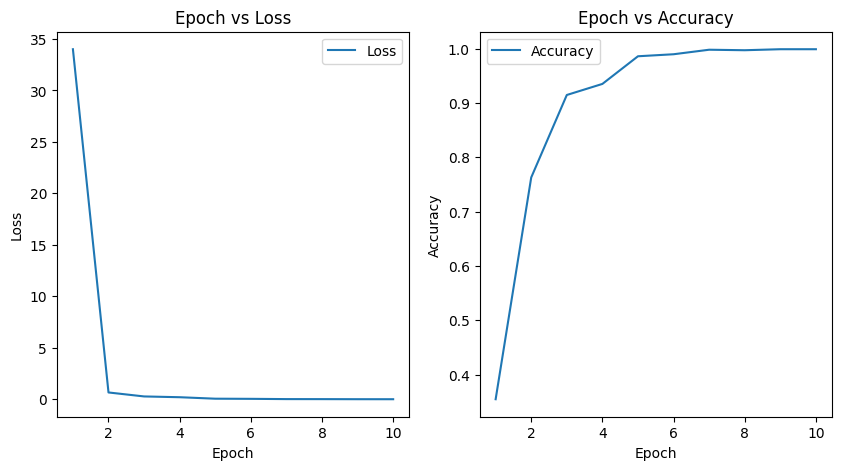

In [12]:
# Побудова графіків
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, epochs + 1), history.history['loss'], label='Loss')
plt.title('Epoch vs Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(1, epochs + 1), history.history['accuracy'], label='Accuracy')
plt.title('Epoch vs Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [13]:
# Get final training and validation accuracy and loss
train_accuracy = history.history['accuracy'][-1] * 100
val_accuracy = history.history['val_accuracy'][-1] * 100
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

print(f"Final training accuracy: {train_accuracy:.2f}%")
print(f"Final validation accuracy: {val_accuracy:.2f}%")
print(f"Final training loss: {train_loss:.4f}")
print(f"Final validation loss: {val_loss:.4f}")

Final training accuracy: 99.91%
Final validation accuracy: 85.00%
Final training loss: 0.0026
Final validation loss: 0.7203
